## NOM, Prénom:
[double cliquez ici et remplissez]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
import sklearn.model_selection
import sklearn.linear_model
import sklearn.datasets
import sklearn.decomposition

## TODOs:

- recompter les poitns par partie, check le bareme
- check la numerotation des questions, le chapitrage
- creer un exemplaire corrige + un exemplaire sujet
- y supprimer les reponses !
- envoyer !

# TP noté 

Rappels des conseils donnés avant le TP:


- avant de terminer, faire `Kernel > Restart & Run All`. Si lorsque nous corrigeons, le code plante parce qu'il ne doit pas etre exécuté dans l'ordre ou il apparait, nous considérerons le code comme défaillant.
- **renommez le fichier de rendu en y insérant vos nom et prénoms**, et inscrivez aussi vos nom et prénoms dans le fichier (une case sera prévue).
- **enregistrez fréquemment** (ctrl+S), quitte a faire des copies .
- prenez les questions dans l'ordre qui vous convient le mieux. Il y a plusieurs parties indépendantes.
- lisez bien les questions. Ce sera assez guidé, mais il faut bien comprendre l'objectif de chaque question.
- si le code met trop de temps à s'exécuter, ce n'est pas normal: interrompez l'exécution (carré en haut, ou bien sinon,`Kernel>Shutdown`)
- **à la fin, faites `Kernel > Restart & Run All`, enregistrez votre travail et déconnectez vous, nous récupérerons vos travaux automatiquement.**
    

# Plan:

- Partie 1: calculs de gradients (3 points)
- Partie 2: descente de gradient (10.5 points)
    + Dont (6 pt) une fraction sont des questions a tiroirs, inter-dépendantes, mais avec vérifications numériques possibles
    + Dont (3.5 pt) une fraction de question complètement indépendantes entre elles et des autres questions
- Partie 3: Optimisation de 1 hyper-paramètre (6 points)
- Partie 4: erreur dans un code  (2 points) 

ce qui fait 21.5 points, ce sera tronqué à 20.

In [2]:
## reponses-a-supprimer:
np.random.seed(4)
N = 1000
D = 3
X = np.random.random((N,D))*5
X[:,0] = 1
w = np.random.random(D)
print("w-true: ", w)
eps = np.random.normal(0,1,N)/100
w[0]/=100
Y = X@w + eps
np.savez("data/Partie2.npz", X=X,Y=Y)

w-true:  [0.01041339 0.54609148 0.35609001]


In [3]:
wtrue = w.copy()
print(wtrue)

[1.04133905e-04 5.46091479e-01 3.56090009e-01]


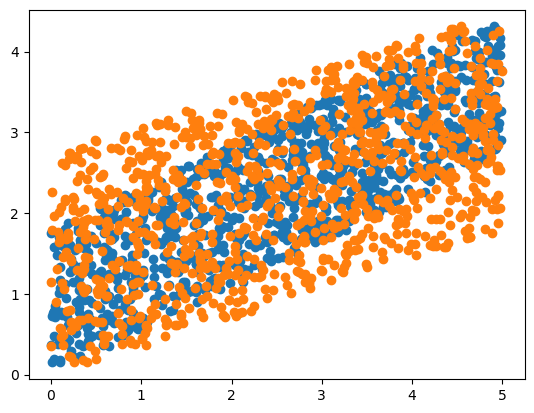

In [4]:
plt.scatter(X[:,1], Y)
plt.scatter(X[:,2], Y)

-------

# Partie 1: calculs de gradients (3 points)



In [5]:
np.random.seed(20)
w=np.random.random(5)
x=np.random.random(5)
y=np.random.random()

### Question 1.1: (1.5 point)

Soit $J_1(\vec w)= 1 + x_0+w_0^2 + x_1^2  w_1 - 2  x_2w_2^2 + x_3^2 w_3 w_4 +x_4^4$.

Calculez $\nabla_{\vec w} J_1({\vec w})$ en fonction de $\vec w$ et des constantes: $\vec x = (x_0, x_1,x_2,x_3,x_4)$.

In [6]:
def gradient_de_J1(w,x) :
    return (2*w[0] , x[1]**2, -4*x[2]*w[2],x[3]**2*w[4], x[3]**2*w[3])  ## TODO 

In [7]:
## aide: pour définir le vecteur (-2,1,4) on peut écrire: np.array([-2, 1, 4])
a = np.array([-2, 3, 4])
a[1]

3

In [8]:
np.round(gradient_de_J1(w,x), 3) ## TODO: effacer ça du sujet ? ou donner quand meme la reponse attendue

array([ 1.176,  0.143, -1.849,  0.016,  0.353])


### Question 1.2: (1.5 point)

Soit $\ell(\vec w, \vec x, y)= \frac12( \vec w \cdot \vec x - y)^2$ 

Calculez $\frac{\partial}{\partial w_1} \ell({\vec w})$ en fonction de $\vec w, \vec x$ et $y$.

Calculez $\nabla_{\vec w} \ell({\vec w})$ en fonction de $\vec w, \vec x$ et $y$.


In [9]:
## derivee par rapport a w[0]:


In [10]:
## gradient par rapport au vecteur w:


In [11]:
x,y,w

(array([0.69175758, 0.37868094, 0.51851095, 0.65795147, 0.19385022]),
 0.2723164020665839,
 array([0.5881308 , 0.89771373, 0.89153073, 0.81583748, 0.03588959]))

In [12]:
def gradient_de_ell(w,x,y):
    return (x@w-y)*x  ## TODO
gradient_de_ell(w,x,y)

array([1.02413446, 0.56063022, 0.76764598, 0.97408512, 0.28699171])

In [13]:
np.round(gradient_de_ell(w,x,y), 3)

array([1.024, 0.561, 0.768, 0.974, 0.287])

-------

# Partie 2: régression linéaire par descente de gradient  (total: 10.5 points)


On va se donner une fonction cout $J$ qui ressemble à celle habituelle (la moyenne des carrés des erreurs (Mean Squared Error)), mais en un peu différent. On vous donne directement le gradient de cette fonction cout $J$ qui est un peu spéciale:


$$  J( \vec w, X, Y) = \alpha ||\vec w||^2 + \frac{1}{N} \sum_n (\vec w \cdot \vec x_n -y_n)^4$$ 

$$ \vec \nabla_{\vec w} J( \vec w, X, Y) = -\alpha \vec w + \frac{1}{N} \sum_n (\vec w \cdot \vec x_n -y_n)^3 \vec x_n $$ 

Ou, dans cette partie, on prendra $\alpha=1$ (`alpha=1`)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
import sklearn.model_selection
import sklearn.linear_model
import sklearn.datasets
import sklearn.decomposition

In [15]:
# on charge les données de l'exercice
load = np.load("data/Partie2.npz")
X = load['X']
Y = load['Y']
## CORRECTEURS: REMARQUE: l'an dernier il y avait eu exactement la meme question au TP noté:
## CORRECTEURS: REMARQUE:  c.a.d que les questions 2.1, 2.2, 2.3 2.4 apparaissaient pareil mais moins guidées
## CORRECTEURS: REMARQUE: et que la question 2.5 (faire la boucle de la GD) était identique.

## Question 2.1: produit scalaire (1 pt, très facile)

On va chercher déjà à calculer le produit scalaire: $\vec w \cdot \vec x_n$, dans une fonction qu'on appelera `w_produit_scalaire_x`. 

Complétez la fonction:

In [16]:
np.random.seed(3)
n=3
w=np.random.random(3)
x=X[n]

In [18]:
def w_produit_scalaire_x(w,x):
    ## remarque : votre code doit fonctionner quel que soit la dimension de w.
    return w@x ## TODO
## CORRECTEURS: REMARQUE: l'an dernier il y avait eu exactement la meme question au TP noté
w_produit_scalaire_x(w,x)

3.597927122912351

In [19]:

## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
print("le resultat devrait etre : 3.597927122912351     "      , \
    "\net il est de             :", w_produit_scalaire_x(w,x))

le resultat devrait etre : 3.597927122912351      
et il est de             : 3.597927122912351


## Questions 2.2: questions de connaissances (1 pt au total)

### Question 2.2.1: régression ou classification ?  (0.5 pt)

Au vu des valeurs prises par le vecteur `Y`, avons nous affaire à une régression ou une classification? 

Justiifez en 1 ligne

In [22]:
# Y

## Votre Reponse: 

# Regression bien sur, car les valeurs prises par Y sont continues et non discrètes

### Question 2.2.2: avec ou sans biais ? (0.5 pt)

Au vu des valeurs prises par le vecteur `X`, notre modèle, $\hat{y}(\vec  x_n) = f(\vec x_n) = \vec w\cdot \vec x_n$, est il un modèle linéaire ou un modèle affine ? (le biais `b` est il présent)?

Justiifez en 1 ligne

Lineaire: $y = ax$

Affine: $y = ax + b$

In [24]:
X[:5]

array([[1.        , 2.73616125, 4.8634218 ],
       [1.        , 3.48864412, 1.08044748],
       [1.        , 0.03115128, 1.26491181],
       [1.        , 3.89691461, 0.98842537],
       [1.        , 4.91700339, 0.81921121]])

# Votre Reponse: 

# avec biais, il est caché dans la colonne de 1 de X. Donc c'est un modèle affine, plus expressif qu'un modèle strictement linéaire.

## Question 2.3: calcul d'un terme (1 pt)

Dans une fonction `calcul_intermediaire(X,Y,n)`, calculez le terme:
$ (\vec w \cdot \vec x_n -y_n)^3 \vec x_n $ pour un `n` fixé

In [25]:
def calcul_intermediaire(X,Y,n, w):
    ## on propose 3 solutions
    
    a = (w@X[n]- Y[n])**3*X[n]  ## TODO
    
    a = ((X@w - Y)**3)[n] * X[n]  ## TODO
    
    ## cette derniere est celle qui permet de 
    ## preparer le mieux la question 2.4 bis
    N = X.shape[0]
    a = (((X@w - Y)**3).reshape(N,1)* X)[n] ## TODO
    return a
calcul_intermediaire(X,Y,3, w)

array([1.40305208, 5.46757414, 1.38681227])

In [26]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
print("le resultat devrait etre:             \n      \
\net il est : \n",calcul_intermediaire(X,Y,3,w))

le resultat devrait etre:             
      
et il est : 
 [1.40305208 5.46757414 1.38681227]


## Question 2.4: calcul de la somme (1pt)

Le but des question 2.1 - 2.4 est de calculer le gradient de $J$, qu'on vous a donné plus haut, on vous rappelle la formule:

$$ \vec \nabla_{\vec w} J( \vec w, X, Y) = -\alpha \vec w + \frac{1}{N} \sum_n (\vec w \cdot \vec x_n -y_n)^3 \vec x_n $$ 

**Indication**: choisir `alpha=0.01`

Dans une fonction `gradient_de_J(X,Y)`, calculez $\vec \nabla_{\vec w} J( \vec w, X, Y) $

In [27]:
alpha=0.01

In [53]:
def gradient_de_J(w,X,Y, alpha):
    N=X.shape[0]
    
#     calcul_intermediaire(X,Y,n,w).sum()
    
    ## TODO
    ## version longue:
    D = X.shape[1]
    g = np.zeros(D)
    for n in range(N):
        g += calcul_intermediaire(X,Y,n,w)
    g/=N
    g-= alpha*w
    
    return g
gradient_de_J(w,X,Y, alpha)

array([0.01058804, 0.03120985, 0.00472033])

In [54]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
np.random.seed(3)
n=3
w0=np.random.random(3)
print("le resultat devrait etre: \n           \
\net il est :\n",gradient_de_J(w0,X,Y, alpha))


le resultat devrait etre: 
           
et il est :
 [0.65907294 2.38204782 1.38500049]


## Question 2.4 bis (bonus): avec plus de numpy (1 pt)

Essayez devectoriser votre calcul en utilisant plus numpy, c.a.d:
- sans utiliser `calcul_intermediaire(X,Y,n,w)`
- en utilisant `np.mean(..., axis=...)`
- en utilisant `.reshape(N,1)`
- en une seule ligne

In [33]:
def gradient_de_J(w,X,Y,alpha):
    N=X.shape[0]
    
    ## TODO
    ## version pythonisée:
    g = np.mean(  (((X@w - Y)**3).reshape(N,1)* X), axis=0)
    g -= alpha*w
    return g
gradient_de_J(w,X,Y,alpha)

array([0.65907294, 2.38204782, 1.38500049])

In [34]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
np.random.seed(3)
n=3
w0=np.random.random(3)
print("le resultat devrait etre: \n           \
\net il est :\n",gradient_de_J(w0,X,Y, alpha))


le resultat devrait etre: 
           
et il est :
 [0.65907294 2.38204782 1.38500049]


## Question 2.5: Descente de Gradient, sans fioritures (1 pt)

Écrire une méthode fit qui implémente le coeur de l'algorithme de descente de gradient.
On suggère les hyper-paramètres suivants:
- $\eta=0.001$ pour le taux d'apprentissage: `eta=0.001`  
- pour le nombre d'iterations maximal: `ITERMAX=100`
- pour l'initialisation de $\vec w$: on vous en donne une, `w0=np.array([0.5507979 , 0.70814782, 0.29090474])`

Pour le moment, on souhaite juste **retourner la valeur de $\vec w$ trouvée, on ne fait pas de suivi.**

In [35]:
w0 = np.array([0.5507979 , 0.70814782, 0.29090474])
eta = 0.001
ITERMAX = 100

In [36]:
def fit(X,Y, w0,eta, ITERMAX, alpha):
    w = w0.copy()
    ## TODO
    for i in range(ITERMAX):
        w -= eta*gradient_de_J(w,X,Y,alpha)
    return w

In [37]:
w0 = np.array([0.5507979 , 0.70814782, 0.29090474])
w = fit(X, Y, w0, eta, ITERMAX,alpha)
w

array([0.52497039, 0.61640001, 0.24492209])

In [38]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
w0 = np.array([0.5507979 , 0.70814782, 0.29090474])
w = fit(X, Y, w0, eta, ITERMAX,alpha)
print("le resultat devrait etre: \n               \
\net il est : \n", w)


le resultat devrait etre: 
               
et il est : 
 [0.52497039 0.61640001 0.24492209]


## Question 2.6: Descente de Gradient, décorée (total 4 pt)

**La plupart des questions suivantes sont en fait indépendantes des précédentes**

On va reprendre la fonction `fit` faite ci-dessus, en y ajoutant du suivi:
- on va partager les données entre *train* et *validation*  
- à chaque itération, on va calculer l'erreur absolue moyenne, pour les deux sous-jeux de données (train et validation) 
- afficher les courbes correspondantes 
- commenter le résultat



### Question 2.6.1: partage des donées (train/validation plit)  (0.5 point)
Partager les données entre ensemble d'entrainement et ensemble de validation à l'aide de `sklearn.model_selection.train_test_split` *(vous avez la doc en ligne de commande avec la commande `?sklearn.model_selection.train_test_split` ou bien en `.html` dans le dossier du sujet)*

**Indication:** Utilisez 20% de données pour le jeu de validation et 80% pour l'entrainement.

**Indication:** Utilisez comme état aléatoire `random_state`, la valeur 6.


In [39]:
## TODO
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split\
( X, Y, test_size=0.2, random_state=6)


In [40]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
print("le resultat devrait etre: \n (800, 3) (200,) \
\net il est : \n", X_train.shape, Y_valid.shape)

le resultat devrait etre: 
 (800, 3) (200,) 
et il est : 
 (800, 3) (200,)


### Question 2.6.2: calcul de l'erreur absolue moyenne (1 pt)
Calculez la valeur de l'erreur absolue moyenne (Mean Absolute Error): $$ \text{MAE} = \frac1N \sum_n^N |\vec w \cdot \vec x_n-y_n|$$



**Indication**: la fonction `np.abs()` permet de calculer la valeur absolue des composantes d'un vecteur.
    
Exemple:

In [41]:
np.abs(np.array([-2,3,-4,5,-1]))

array([2, 3, 4, 5, 1])

In [42]:
def fonction_MAE(w,X,Y):
    ## TODO
    MAE = np.abs(X@w-Y)
    MAE = np.mean(MAE)
    return MAE
fonction_MAE(w0,X,Y)

0.7985238252518674

In [43]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
print("le resultat devrait etre: \n                  \
\net il est : \n", fonction_MAE(w0,X,Y) )

le resultat devrait etre: 
                  
et il est : 
 0.7985238252518674


### Question 2.6.3: intégration dans la fonction `.fit` (1 pt)

**(Cette question dépend de la question 2.4)**
Intégrez ce calcul dans votre fonction fit, qui devra maintenant recevoir comme données les données d'entrainement, `X_train`, `Y_train`, mais aussi `X_valid`, `Y_valid`:

**remarque**: même si vos fonctions précédentes ne sont pas toutes correctes, vous pouvez récupérer des points en écrivant un code cohérent, c.a.d. un code qui serait correct si vos questions précédentes étaient correctes elles aussi. Ce sera plus dur a debugger et vous n'aurez peut être pas tous les points mais c'est déjà ça...

In [44]:
def fit_amelioree(X, Y, X_valid, Y_valid, w0, eta, ITERMAX, alpha):
    MAE_train = np.zeros(ITERMAX)
    MAE_valid = np.zeros(ITERMAX)
    w = w0.copy()
    ## TODO: (4 lignes)
    for i in range(ITERMAX):
        w -= eta*gradient_de_J(w,X,Y, alpha)
        MAE_train[i] = fonction_MAE(w, X, Y)
        MAE_valid[i] = fonction_MAE(w, X_valid, Y_valid)
    return w, MAE_train, MAE_valid

In [52]:
eta = 0.001
ITERMAX = 1000
w, MAE_train, MAE_valid = fit_amelioree(X_train, Y_train, X_valid, Y_valid, w0, eta, ITERMAX, alpha)
fonction_MAE(w, X_train, Y_train)

0.1879618321600423

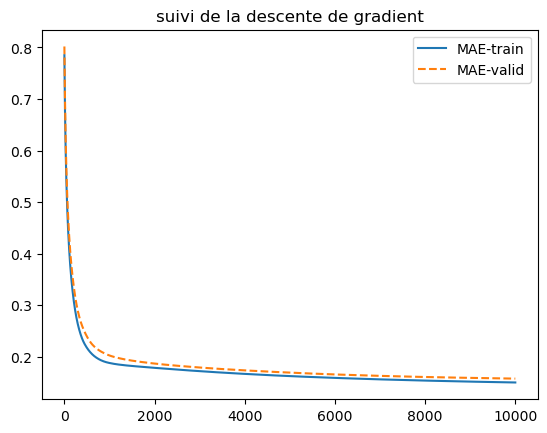

In [50]:
plt.plot(MAE_train, label= 'MAE-train')
plt.plot(MAE_valid, label= 'MAE-valid', ls="--")
plt.legend()
plt.title("suivi de la descente de gradient")
plt.savefig("data/question2-5-3.png")

### Question 2.6.4: commentaires (0.5 pt)

On obtient normalement quelque chose de similaire a la figure ci dessous.


(-0.5, 639.5, 479.5, -0.5)

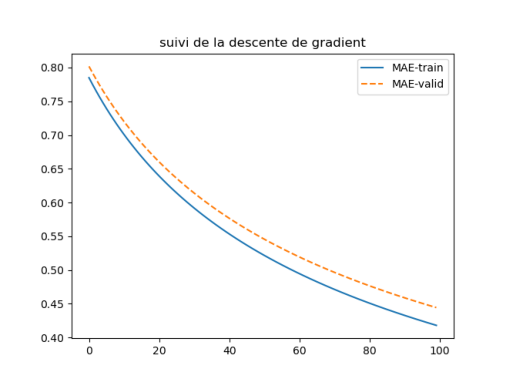

In [39]:
plt.imshow(mpimg.imread('data/question2-5-3.png'))
plt.axis('off')

- Que peut on en déduire sur la valeur de `eta`, et/ou la valeur de `ITERMAX` ?

### Votre Reponse:

##  $\eta$ (`eta`) est trop petit et ITERMAX trop petit aussi: manifestement la descente de gradient n'a pas encore convergé.

### Question 2.6.5: ajustement d'yper-parmètre (1 pt)

**Remarque: cette question dépend de pratiquement TOUTES les précédentes - si votre code ne semble pas bon, passez a la suite**

Sans y passer trop de temps, ajuster la valeur de `eta` de sorte a améliorer nettement le résultat final. Quand peut on être relativement satisfait du choix de cet hyper-paramètre ? 

**Conseil**: gardez `ITERMAX=100`, surtout si vous n'avez pas réussi a faire le calcul de gradient en mode numpy (Question 2.4).

In [55]:
## TODO
eta = 0.1
ITERMAX = 1000 ## en fait le mieux est aussi d'augmenter ITERMAX. Mais avec le code en python naif, c'est tres lent..
w, MAE_train, MAE_valid = fit_amelioree(X_train, Y_train, X_valid, Y_valid, w0, eta, ITERMAX, alpha)
fonction_MAE(w, X_train, Y_train)

0.1220805933167239

Text(0.5, 1.0, 'suivi de la descente de gradient')

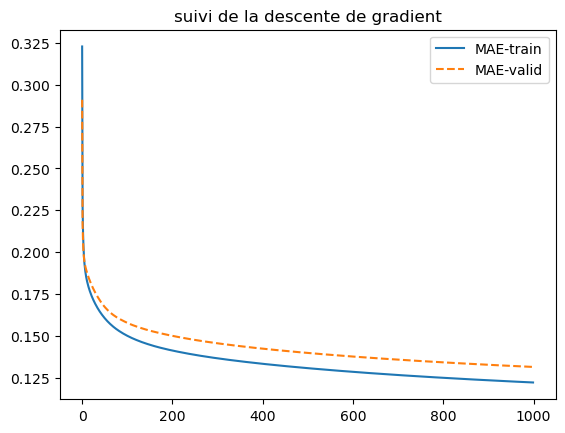

In [41]:
plt.plot(MAE_train, label= 'MAE-train')
plt.plot(MAE_valid, label= 'MAE-valid', ls="--")
plt.legend()
plt.title("suivi de la descente de gradient")

In [42]:
w, w0, wtrue

(array([0.40251348, 0.49549026, 0.27885036]),
 array([0.5507979 , 0.70814782, 0.29090474]),
 array([1.04133905e-04, 5.46091479e-01, 3.56090009e-01]))

## Question 2.7: prédictions (0.5 pt)

**Remarque: meme sans certaines des questions précédentes, on peut faire cette question**

- définir la fonction `predict`, qui calcule la prédiction du modèle $\hat{y}_n=f_w(x_n)$ (se rappeler de la question 2.1) 
- **Indication:** faire un code qui fonctionne lorsque $X$ est de taille $(N,D)$, c.a.d qu'on calcule les prédictions pour tout un ensemble de données
- Que peut on dire, qualitativement, en observant la figure obtenue ?

In [43]:
## faire un code qui fonctionne lorsque X est de taille N,D, 
## c.a.d qu'on calcule les prédictions pour tout un ensemble de données
def predict(w,X):
    return X@w  ## TODO
ypredit = predict(w,X)

### Plot: c'est cadeau:

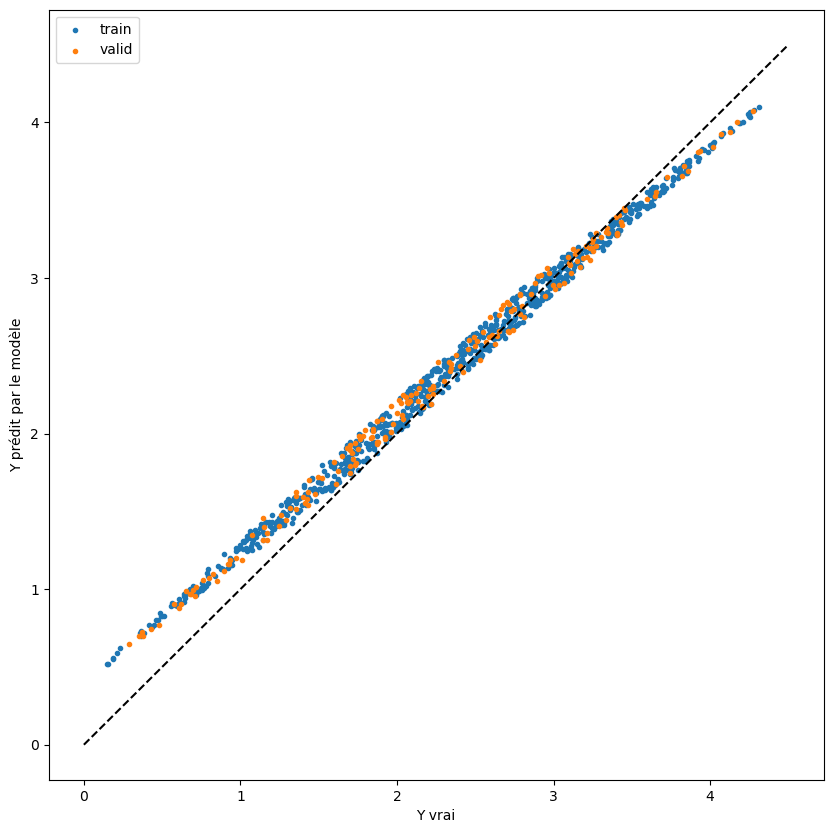

In [44]:
plt.figure(1,[10,10]) 
plt.scatter(Y_train, predict(w,X_train), marker='.', label="train")
plt.scatter(Y_valid, predict(w,X_valid), marker='.', label="valid")
plt.plot([0,4.5],[0,4.5], ls='--', color='k')
plt.xlabel("Y vrai")
plt.ylabel("Y prédit par le modèle")
plt.legend()


- Que peut on dire, qualitativement, en observant la figure obtenue ?

## Que peut on dire, qualitativement, en observant la figure obtenue ?

## votre reponse:  C'est pas terrible, en fait. On n'a pas vraiment convergé, alors que ça semble possible.

C'est un problème assez fin, lié a la forme bizzare de notre fonction cout, et des données.


-------

# Partie 3: Optimisation de 1 hyper-paramètre (6 pt)

Ici on va optimiser un hyper-paramètre en faisant une cross-validation dessus.
Il pourra être utile de consulter le code présenté en cours magistral, `2022-54-exemple-RegLin-CM--Optimization1Hyper-param-simple-remplie.ipynb` (la correction est donnée)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
import sklearn.model_selection
import sklearn.linear_model
import sklearn.datasets
import sklearn.decomposition

In [57]:
## on charge les données pour vous:
x,y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
x_trainval, x_test, y_trainval, y_test = sklearn.model_selection.train_test_split( x, y, \
                                                                                  test_size=0.2, random_state=4)
np.savez("data/Partie3-optimisation.npz", x_trainval=x_trainval, x_test=x_test, y_trainval=y_trainval, y_test=y_test)

# ## ce code là est valide, on charge simplement les données:
# X,Y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
# # X /= X.max()  # on met X (les intensités de niveaux de gris) entre 0 et 1
# X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X, Y, \
#                                              test_size=0.4, \
#                                              random_state=5)
# np.savez("Partie4-debug.npz", Xtrain=X_train, Xvalid=X_valid, Ytrain=Y_train, Yvalid=Y_valid)
# ## TODO: supprimer ce bloc du sujet, le garder dans le corrigé seulement

In [58]:
## ce code là est valide, on charge simplement les données:
loader = np.load("data/Partie3-optimisation.npz")
x_trainval = loader['x_trainval']
x_test     = loader['x_test']
y_trainval = loader['y_trainval']
y_test     = loader['y_test']



#### Plan des questions :
- split
- essai du modèle
- définition de la plage de valeurs de l'hyper-parametre a essayer
- cross-validation (automatisée)
- boucle sur alpha
- interprétation, choix du meilleur alplha
- calcul du score de test

### Question 3.1 : valeurs a essayer pour `alpha`  (0.25 pt)
- définissez une plage de valeurs pour alpha croissant de facon exponentielle, a l'aide de `np.logspace`
- allez de $10^{-2}$ à $10^4$, en prenant au moins 10 valeurs entre les 2

In [59]:
##TODO
plage_de_valeurs_pour_alpha = np.logspace(-2,4, num=20)

### Question 3.2: définir un modèle Ridge (0.25 pt)
- définissez une instance de `sklearn.linear_model.Ridge` nommée `monModele` en choissant un alpha arbitraire, par exemple `alpha=10`

In [60]:
##TODO
monModele = sklearn.linear_model.Ridge(alpha=10)

### Question 3.3 : cross-validation (1.5 pt)
- essayer le module `sklearn.model_selection.cross_validate` en utilisant en entrée votre instance de modèle, `monModele`     (0.5 pt)
- utilisez 5 plis pour la cross-validation
- à quoi correspondent tous les tableaux renvoyés lorsqu'on utilise l'argument `return_train_score=True` ? (0.5 pt)

**Remarque**: dans `sklearn`, le score de validation est appelé `test_score`.

In [61]:
nombreDePlisDeCV= 5
##TODO
sklearn.model_selection.cross_validate(monModele, \
                x_trainval, y_trainval, \
                cv = nombreDePlisDeCV, return_train_score=True)

{'fit_time': array([0.01052332, 0.00761724, 0.00824594, 0.00503278, 0.00536656]),
 'score_time': array([0.00119519, 0.00170183, 0.00165558, 0.00137258, 0.00165367]),
 'test_score': array([0.59977585, 0.5713718 , 0.51113517, 0.52430616, 0.59880801]),
 'train_score': array([0.59234124, 0.60026169, 0.61492746, 0.60914447, 0.59169247])}

- à quoi correspondent tous les tableaux renvoyés lorsqu'on utilise l'argument `return_train_score=True` ? (0.5 pt)

**Remarque**: dans `sklearn`, le score de validation (dans la cross-validation) est appelé `test_score`.

## à quoi correspondent tous les tableaux renvoyés lorsqu'on utilise l'argument `return_train_score=True` ?

## votre réponse:

# La on attendait une réponse sur chacun des 4 éléments, et bien de dire que test_score est le score de VALIDATION pour les 5 plis,

### Question 3.4 : boucle sur les valeurs de `alpha` (1 pt)

- mettez toutes les étapes ci dessus ensemble, afin de calculer la cross-validation pour toutes les valeurs de alpha choisies en question 3.3

In [62]:
nombreDePlisDeCV = 5
##TODO
# plage_de_valeurs_pour_alpha = np.logspace(-2,4, num=20)## attention, les valeurs dans les arguments de np.logspace sont à modifier !!
trainScore = np.zeros((plage_de_valeurs_pour_alpha.shape[0], nombreDePlisDeCV))
validScore = np.zeros((plage_de_valeurs_pour_alpha.shape[0], nombreDePlisDeCV))
for i, alpha in enumerate(plage_de_valeurs_pour_alpha):
    monModele = sklearn.linear_model.Ridge(alpha=alpha)
    myCV = sklearn.model_selection.cross_validate(monModele, \
                x_trainval, y_trainval, \
                cv = nombreDePlisDeCV, return_train_score=True)
    trainScore[i] = myCV['train_score']
    validScore[i] = myCV['test_score']

### Cadeau: le plot

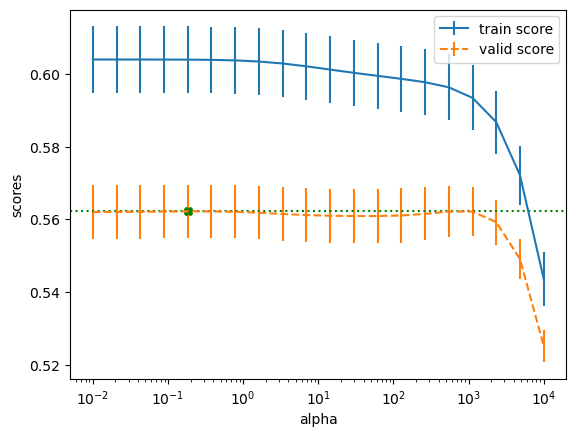

In [63]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure() 
plt.errorbar(plage_de_valeurs_pour_alpha, np.mean(trainScore,axis=1)   , \
             label= "train score",yerr=np.std(trainScore,axis=1))
plt.errorbar(plage_de_valeurs_pour_alpha, np.mean(validScore,axis=1)   ,
             label= "valid score",yerr=np.std(validScore,axis=1)/nombreDePlisDeCV, ls='--')
plt.xlabel("alpha")
plt.ylabel("scores")
plt.legend()
plt.semilogx()


## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte de l'overfitting, etc:
## il peut etre affiné a la main
linear_valid_score = np.mean(validScore,axis=1)
bestIndex = np.argmax( linear_valid_score )
bestNC = plage_de_valeurs_pour_alpha[bestIndex ]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')
plt.axhline(linear_valid_score[bestIndex], ls=':', color= 'green')

plt.savefig("data/question3-5.png") ## TODO: erase this from subject

### Question 3.5: interprétation (2 points)

Sur la courbe que vous obtenez (fournie ci dessous, pour ne pas vous bloquer), on a indiquer avec un point vert le maximum de la courbe de validation.

On a aussi indiqué avec un trait horizontal pointillé, le score correspondant à cette valeur.


(-0.5, 639.5, 479.5, -0.5)

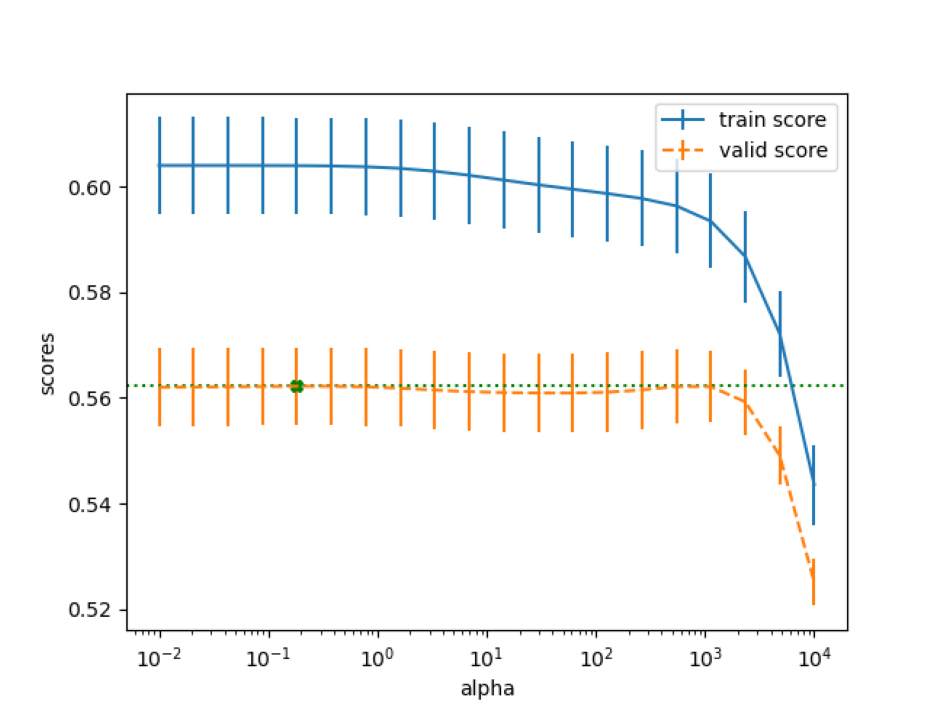

In [64]:
## au cas ou vous auriez bloqué avant, on vous fourni une réponse possible à la question précédente:
plt.figure(1, [12,12])
plt.imshow(mpimg.imread('data/question3-5.png'))
plt.axis('off')


- quelle est la meilleure valeur à prendre pour `alpha`, a priori ? Pourquoi ?

- sachant que `alpha` controle le degré de régularisation, et qu'on dispose de peu de données, un autre choix est il possible ?


## - quelle est la meilleure valeur à prendre pour `alpha`, a priori ? Pourquoi ?

# Votre réponse: Le meilleur score de validaiton est atteint prcohe de $10^{-1}$. Donc, on peut repondre simpleemnt 0.1 (ou 0.2 pour etre precis)

## - sachant que `alpha` controle le degré de régularisation, et qu'on dispose de peu de données, un autre choix est il possible ?

# Votre réponse: a 10**3, en fait, on regularize plus, donc a priori meilleure generalization , d'ailleurs la barre d'erreur est pus petit, et l'overfit aussi plus petit. Donc c'est une meilleure valeur.

-------------------
### Question 3.6: Score de test (0.5 pt)
- en utilisant autant de données qu'il est permis, entrainez le modèle pour la meilleure valeur de `alpha` possible, puis calculez le score de test. 

In [65]:
# en utilisant autant de données qu'il est permis, 
# entrainez le modèle pour la meilleure valeur de `alpha` possible, 
# puis calculez le score de test.  

##TODO:
monModele = sklearn.linear_model.Ridge(alpha=1000)
monModele.fit(x_trainval, y_trainval)
monModele.score(x_trainval, y_trainval), monModele.score(x_test,y_test)

(0.5916285031122822, 0.5796077257696792)

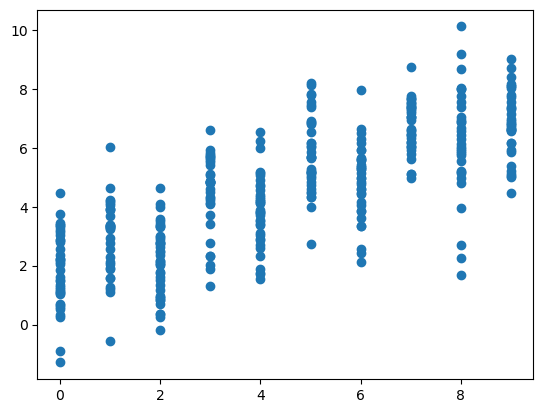

In [66]:
plt.scatter(y_test, monModele.predict(x_test))

In [55]:

# Votre réponse:

-------------------
### Question 3.7: logique, logique... (0.5 pt)
 
- Quel est l'aspect un peu absurde de notre régression, au vu des valeurs prises par `y` dans cette "Partie 3"?

Astuce: on peut afficher l'ensemble des valeurs prises par un array avec `np.unique` ou avec `list(set(y))`:

In [56]:
##TODO:
np.unique(y_trainval), list(set(y_trainval))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Quel est l'aspect un peu absurde de notre régression, au vu des valeurs prises par `Y` ?

# Votre réponse: c'est idiot, on devrait faire une classification car les labels sont catégoriels, pas reels.

-------

# Partie 4: erreurs dans des codes  (2 points) 


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
import sklearn.model_selection
import sklearn.linear_model
import sklearn.datasets
import sklearn.decomposition

## Question 4.1: PCA + SVM : code faux (2 pt)

In [58]:
##TODO: ERASE:
## ce code là est valide, on charge simplement les données:
X,Y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
# X /= X.max()  # on met X (les intensités de niveaux de gris) entre 0 et 1
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X, Y, \
                                             test_size=0.4, \
                                             random_state=5)
np.savez("data/Partie4-debug.npz", Xtrain=X_train, Xvalid=X_valid, Ytrain=Y_train, Yvalid=Y_valid)
## TODO: supprimer ce bloc du sujet, le garder dans le corrigé seulement

In [59]:
## ce code là est valide, on charge simplement les données:
loader = np.load("data/Partie4-debug.npz")
Xtrain = loader['Xtrain']
Xvalid = loader['Xvalid']
Ytrain = loader['Ytrain']
Yvalid = loader['Yvalid']

Voici un code qui comporte une erreur (conceptuelle). Quelle est elle ? 

In [60]:
Xtrain.shape, Xvalid.shape

((1078, 64), (719, 64))

In [61]:
## pre-processing:
preProc = sklearn.decomposition.PCA(n_components=10)
preProc.fit(Xtrain)
X_train_Transformed = preProc.transform(Xtrain)
X_valid_Transformed = preProc.transform(Xvalid)

## classification:
clf = sklearn.svm.SVC(C=1, kernel='poly' , degree=4)
clf.fit(X_train_Transformed, Ytrain)
trainscore = clf.score(X_train_Transformed, Ytrain)
clf.fit(X_valid_Transformed, Yvalid)
validscore = clf.score(X_valid_Transformed, Yvalid)
print("train score=", trainscore)
print("valid score=", validscore)

train score= 0.9434137291280148
valid score= 0.9471488178025035


- Proposez une correction (1.5 points)

In [62]:
## copiez-collez le code à corriger ici, et corrigez le

##TODO: ERASE:
## pre-processing:
preProc = sklearn.decomposition.PCA(n_components=10)
preProc.fit(Xtrain)
X_train_Transformed = preProc.transform(Xtrain)
X_valid_Transformed = preProc.transform(Xvalid)

## classification:
clf = sklearn.svm.SVC(C=1, kernel='poly' , degree=4)
clf.fit(X_train_Transformed, Ytrain)
trainscore = clf.score(X_train_Transformed, Ytrain)
# clf.fit(X_valid_Transformed, Yvalid)
validscore = clf.score(X_valid_Transformed, Yvalid)
print("train score=", trainscore)
print("valid score=", validscore)

train score= 0.9434137291280148
valid score= 0.8984700973574409


- Expliquez le changement de performance entre avant et après correction (0.5 point)

## Votre réponse:

##  il ne faut pas fit deux fois le modele ! Et surtout pas le fit avec des donnees de validation !